## Q1

1. Greenhouse. Consider an experiment to study the effect of three types of fertilizer (F1, F2, and F3)
on the growth of two species of plant (SppA and SppB). The data are as follows:

### input data

In [100]:
Fert=c(rep("control", 12), rep("f1", 12),
rep("f2", 12), rep("f3", 12))
Species=c(rep(c(rep("SppA", 6), rep("SppB", 6)),4))
Height=c(21.0, 19.5, 22.5, 21.5, 20.5, 21.0,
23.7, 23.8, 23.8, 23.7, 22.8, 24.4,
32.0, 30.5, 25.0, 27.5, 28.0, 28.6,
30.1, 28.9, 30.9, 34.4, 32.7, 32.7,
22.5, 26.0, 28.0, 27.0, 26.5, 25.2,
30.6, 31.1, 28.1, 34.9, 30.1, 25.5,
28.0, 27.5, 31.0, 29.5, 30.0, 29.2,
36.1, 36.6, 38.7, 37.1, 36.8, 37.1)
df=data.frame(Fert=Fert, Species=Species, Height=Height)
df

Fert    Species Height
1  control SppA    21.0  
2  control SppA    19.5  
3  control SppA    22.5  
4  control SppA    21.5  
5  control SppA    20.5  
6  control SppA    21.0  
7  control SppB    23.7  
8  control SppB    23.8  
9  control SppB    23.8  
10 control SppB    23.7  
11 control SppB    22.8  
12 control SppB    24.4  
13 f1      SppA    32.0  
14 f1      SppA    30.5  
15 f1      SppA    25.0  
16 f1      SppA    27.5  
17 f1      SppA    28.0  
18 f1      SppA    28.6  
19 f1      SppB    30.1  
20 f1      SppB    28.9  
21 f1      SppB    30.9  
22 f1      SppB    34.4  
23 f1      SppB    32.7  
24 f1      SppB    32.7  
25 f2      SppA    22.5  
26 f2      SppA    26.0  
27 f2      SppA    28.0  
28 f2      SppA    27.0  
29 f2      SppA    26.5  
30 f2      SppA    25.2  
31 f2      SppB    30.6  
32 f2      SppB    31.1  
33 f2      SppB    28.1  
34 f2      SppB    34.9  
35 f2      SppB    30.1  
36 f2      SppB    25.5  
37 f3      SppA    28.0  
38 f3      SppA    27.5  
39 f3      SppA    31.0  
40 f3      SppA    29.5  
41 f3      SppA    30.0  
42 f3      SppA    29.2  
43 f3      SppB    36.1  
44 f3      SppB    36.6  
45 f3      SppB    38.7  
46 f3      SppB    37.1  
47 f3      SppB    36.8  
48 f3      SppB    37.1

### (a) 

Write out the 2-way complete model for this experiment.

$$Y_{ijt} = \mu + \alpha_i + \beta_j + (\alpha \beta)_{ij} + \epsilon_{ijt}, \: \epsilon_{ijt}
\stackrel{iid}{\sim} N(0, \sigma^2)$$

$$i = control, f_1, f_2, f_3$$
$$j = SppA, SppB$$
$$t = 1, 2, 3, 4, 5, 6$$

### (b) 

Fit the model using R and examine the residuals. Transform the response if needed to address any
problems with normality or constant error variance. If you transform the response, clearly show the
residuals from the un-transformed response, and your best transformation, and describe why you chose
the transformation you did.

#### Null hypothesis:

$$H_0 : (\alpha \beta)_{ij} = 0 \: for \: all \: i, j$$

In [101]:
library(car)
modelAB=aov(Height~Fert+Species+Fert:Species, data=df)
anova(modelAB)
Anova(modelAB,type="III")

Df Sum Sq    Mean Sq   F value   Pr(>F)      
Fert          3 745.43750 248.47917 73.098232 2.765659e-16
Species       1 236.74083 236.74083 69.645020 2.706508e-10
Fert:Species  3  50.58417  16.86139  4.960326 5.080577e-03
Residuals    40 135.97000   3.39925        NA           NA

Sum Sq     Df F value    Pr(>F)      
(Intercept)  2646.00000  1 778.407002 7.768919e-28
Fert          251.44000  3  24.656419 3.373242e-09
Species        21.87000  1   6.433772 1.520353e-02
Fert:Species   50.58417  3   4.960326 5.080577e-03
Residuals     135.97000 40         NA           NA

In [98]:
p_fert_species = 5.080577e-03
p_fert_species < 0.05

[1] TRUE

Since the p value of `Fert:Species` are smaller than 0.05, hence we are able to reject the null hypothesis at significance level of $\alpha = 0.05$, assume that interaction effects are not zero.

### check whether transformation is needed

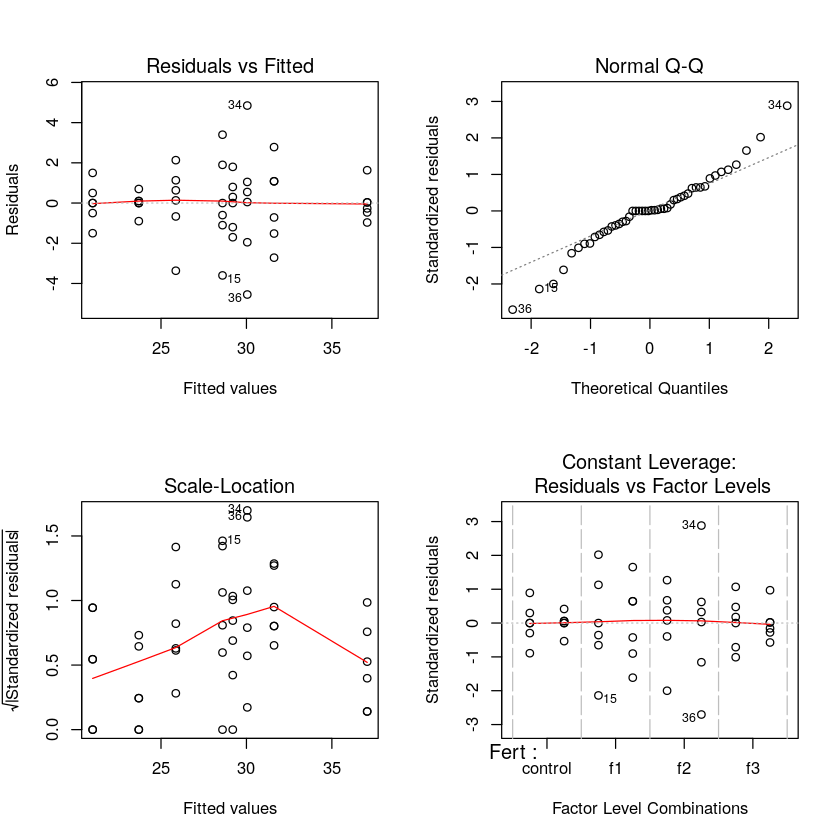

In [102]:
par(mfrow=c(2,2))
plot(modelAB)

From the Residual vs. Fitted plot we can see that for each vertical line of points representing a different treatment, the spread on the points does not appear to be equal. These 3 treatments do not have the same variance, the 2nd treatment has slightly larger spread than the others. So the assumption of constant variance is violated. 

From the QQ-plot above we could conclude that since not all the points fall on the dotted line, thus the residuals are not normal, it also appears to be slightly heavy tailed.

### try transformation

In [23]:
library(knitr)
library(lsmeans)

#### square root



|             | Df|    Sum Sq|   Mean Sq|   F value|    Pr(>F)|
|:------------|--:|---------:|---------:|---------:|---------:|
|Fert         |  3| 6.7501422| 2.2500474| 75.993806| 0.0000000|
|Species      |  1| 2.0196976| 2.0196976| 68.213898| 0.0000000|
|Fert:Species |  3| 0.3273222| 0.1091074|  3.685028| 0.0196204|
|Residuals    | 40| 1.1843320| 0.0296083|        NA|        NA|

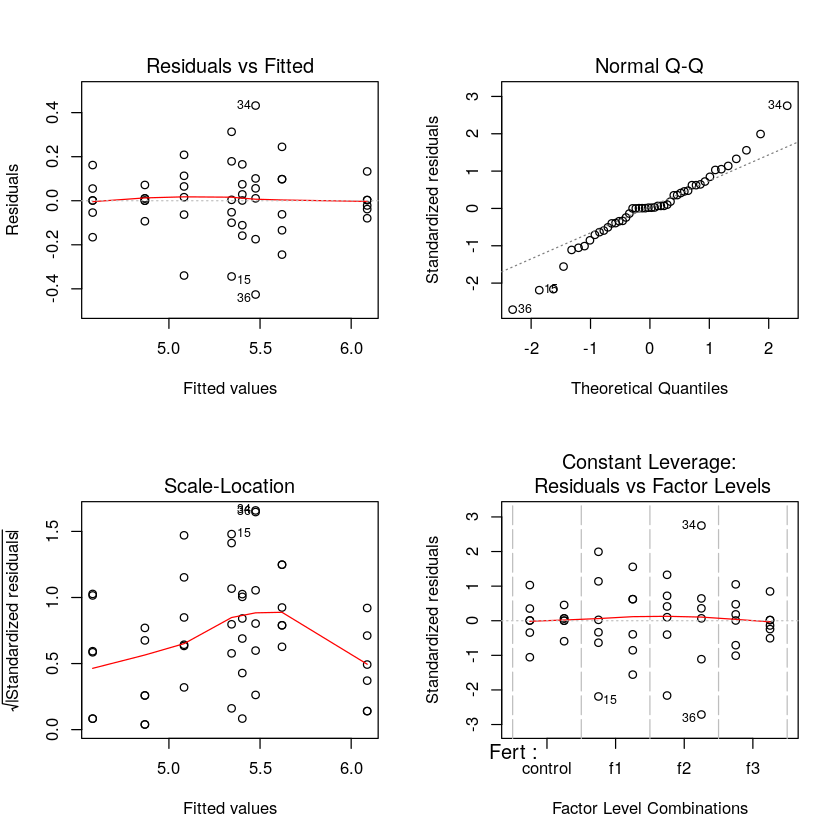

In [103]:
df$sqrt_Height = sqrt(df$Height)
model_sqrt_AB=aov(sqrt_Height~Fert+Species+Fert:Species, data=df)
kable(anova(model_sqrt_AB), format='markdown')
par(mfrow=c(2,2))
plot(model_sqrt_AB)

#### log



|             | Df|    Sum Sq|   Mean Sq|   F value|    Pr(>F)|
|:------------|--:|---------:|---------:|---------:|---------:|
|Fert         |  3| 0.9902483| 0.3300828| 78.813105| 0.0000000|
|Species      |  1| 0.2791987| 0.2791987| 66.663622| 0.0000000|
|Fert:Species |  3| 0.0331922| 0.0110641|  2.641739| 0.0624076|
|Residuals    | 40| 0.1675268| 0.0041882|        NA|        NA|

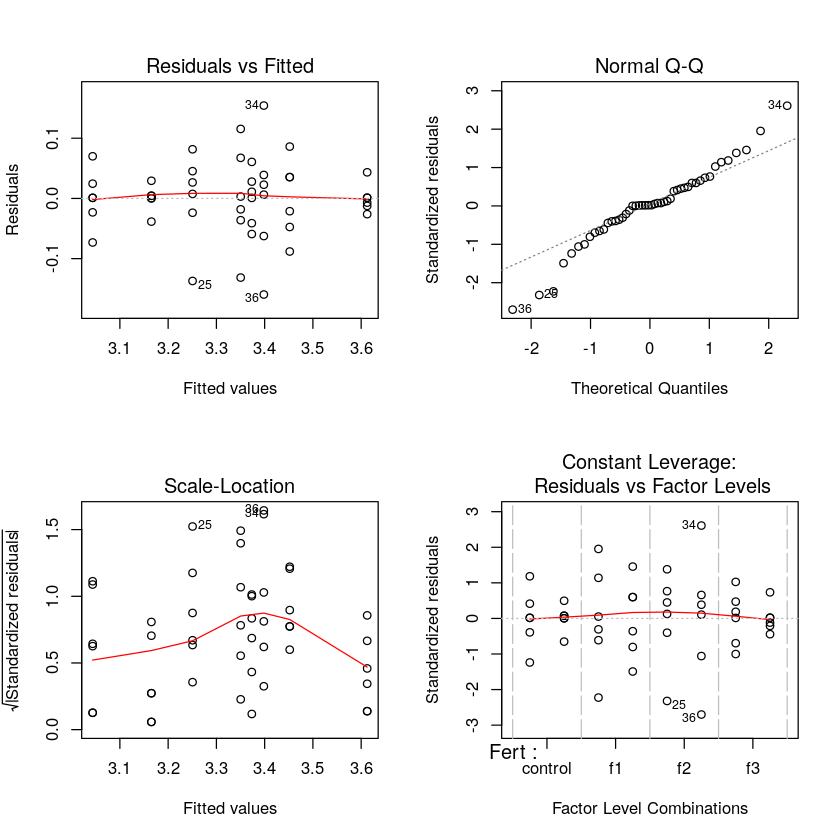

In [104]:
df$log_Height = log(df$Height)
model_log_AB=aov(log_Height~Fert+Species+Fert:Species, data=df)
kable(anova(model_log_AB), format='markdown')
par(mfrow=c(2,2))
plot(model_log_AB)

#### square



|             | Df|    Sum Sq|   Mean Sq|  F value|    Pr(>F)|
|:------------|--:|---------:|---------:|--------:|---------:|
|Fert         |  3| 2362176.0| 787392.01| 67.49736| 0.0000000|
|Species      |  1|  842503.9| 842503.91| 72.22170| 0.0000000|
|Fert:Species |  3|  282582.2|  94194.08|  8.07457| 0.0002528|
|Residuals    | 40|  466620.9|  11665.52|       NA|        NA|

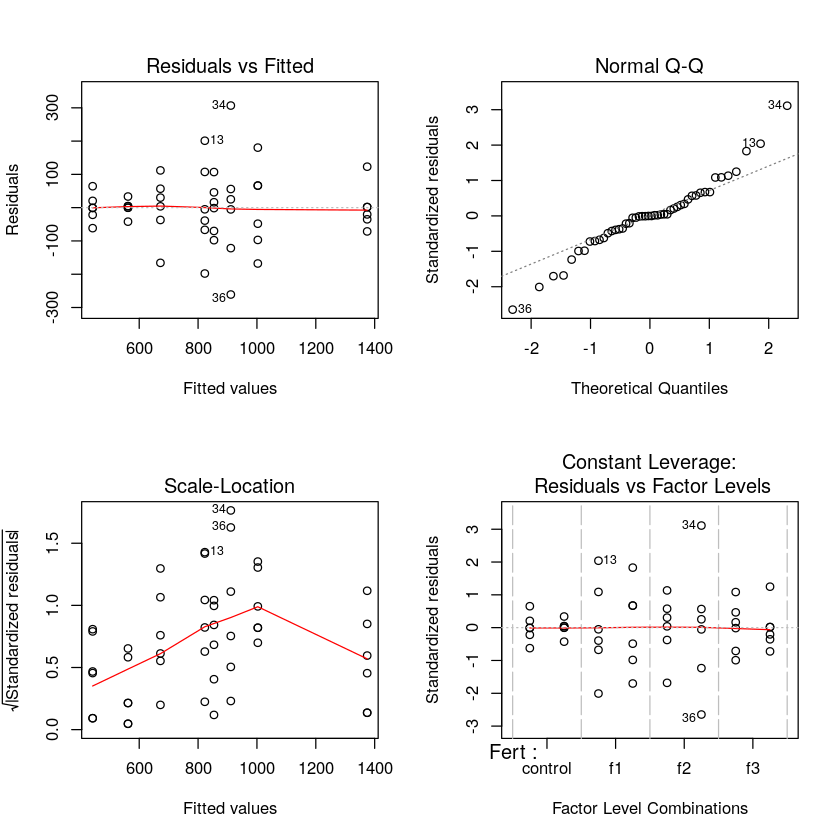

In [105]:
df$square_Height = df$Height^2
model_square_AB=aov(square_Height~Fert+Species+Fert:Species, data=df)
kable(anova(model_square_AB), format='markdown')
par(mfrow=c(2,2))
plot(model_square_AB)

However, it seems that after transformation, the residual vs. fitted value plot and the QQ plot still remains as similar to the original version without incurring much changes. Hence we could leave the Height parameter untransformed.

### (c) 

Describe the effect of species and fertilizer on mean height. This description should use the results
of hypothesis tests and p-values as described in class. Discuss any relevant interaction effects, main
effects and pairwise differences between treatment means. Provide a plot that shows the means for all
combinations of factor levels. Provide R code and output that supports your results.

Since we reject the null hypothesis and find a significant interaction effect between Fert and Species, so instead of looking at the levels of Factor Fert  and Factor Species independently, we proceed directly to looking for significant differences between all possible combinations of treatments.

 contrast                      estimate       SE df t.ratio p.value
 control,SppA - f1,SppA       -7.600000 1.064464 40  -7.140  <.0001
 control,SppA - f2,SppA       -4.866667 1.064464 40  -4.572  0.0011
 control,SppA - f3,SppA       -8.200000 1.064464 40  -7.703  <.0001
 control,SppA - control,SppB  -2.700000 1.064464 40  -2.536  0.2101
 control,SppA - f1,SppB      -10.616667 1.064464 40  -9.974  <.0001
 control,SppA - f2,SppB       -9.050000 1.064464 40  -8.502  <.0001
 control,SppA - f3,SppB      -16.066667 1.064464 40 -15.094  <.0001
 f1,SppA - f2,SppA             2.733333 1.064464 40   2.568  0.1979
 f1,SppA - f3,SppA            -0.600000 1.064464 40  -0.564  0.9991
 f1,SppA - control,SppB        4.900000 1.064464 40   4.603  0.0010
 f1,SppA - f1,SppB            -3.016667 1.064464 40  -2.834  0.1150
 f1,SppA - f2,SppB            -1.450000 1.064464 40  -1.362  0.8685
 f1,SppA - f3,SppB            -8.466667 1.064464 40  -7.954  <.0001
 f2,SppA - f3,SppA            -3.333333 1.064464

Fert    Species lsmean   SE        df lower.CL upper.CL .group
1 control SppA    21.00000 0.7526896 40 19.47876 22.52124  1    
5 control SppB    23.70000 0.7526896 40 22.17876 25.22124  12   
3 f2      SppA    25.86667 0.7526896 40 24.34542 27.38791   23  
2 f1      SppA    28.60000 0.7526896 40 27.07876 30.12124    34 
4 f3      SppA    29.20000 0.7526896 40 27.67876 30.72124    34 
7 f2      SppB    30.05000 0.7526896 40 28.52876 31.57124     4 
6 f1      SppB    31.61667 0.7526896 40 30.09542 33.13791     4 
8 f3      SppB    37.06667 0.7526896 40 35.54542 38.58791      5

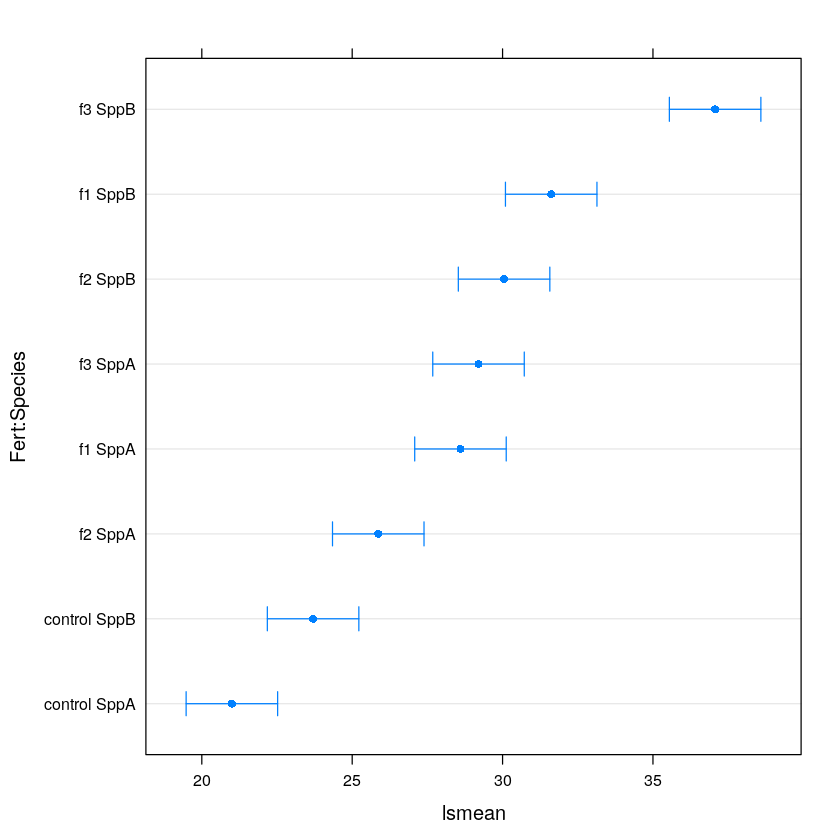

In [66]:
library(multcompView)
modelAB=aov(Height~Fert+Species+Fert:Species, data=df)
lsminter=lsmeans(modelAB, ~ Fert:Species)
contrast(lsminter,method="pairwise")
contrast_inter = cld(lsminter, alpha=0.05)
contrast_inter
plot(contrast_inter)

We could interpret the results of this analysis as follows:
- control-SppA has significantly lower mean than f1-SppA , f3-SppA, f1-SppB, f2-SppB, and f3-SppB.
- control-SppB has significantly lower mean than f1-SppB, f2-SppB, and f3-SppB.
- f2-SppA has significantly lower mean than f1-SppB, f2-SppB, and f3-SppB.
- f1-SppA has significantly lower mean than f3-SppB.
- f3-SppA has significantly lower mean than f3-SppB.
- f2-SppB has significantly lower mean than f3-SppB.
- f1-SppB has significantly lower mean than f3-SppB.
- No other comparisons are significantly different than zero.

## Q2

2. Consider the following data, the result of a 2-factor factorial experiment with 5 replications for each
combination of Factor A and Factor B. Treatment combinations were assigned at random to the 20
experimental units.

### input data

In [89]:
A=as.factor(c(rep(1, 10), rep(2, 10)))
B=as.factor(rep(c(c(rep(1, 5), rep(2, 5))), 2))
resp=c(12.9, 11.3, 11.7, 12.1, 12.3,
13.7, 12.8, 13.6, 13.1, 13.5,
14.2, 14.5, 13.9, 13.6, 14.4,
13.5, 13.1, 13.3, 13.1, 13.4)
df=data.frame(A=A, B=B, resp=resp)
df

A B resp
1  1 1 12.9
2  1 1 11.3
3  1 1 11.7
4  1 1 12.1
5  1 1 12.3
6  1 2 13.7
7  1 2 12.8
8  1 2 13.6
9  1 2 13.1
10 1 2 13.5
11 2 1 14.2
12 2 1 14.5
13 2 1 13.9
14 2 1 13.6
15 2 1 14.4
16 2 2 13.5
17 2 2 13.1
18 2 2 13.3
19 2 2 13.1
20 2 2 13.4

### (a)

Write out the 2-way complete model for this experiment.

$$Y_{ijt} = \mu + \alpha_i + \beta_j + (\alpha \beta)_{ij} + \epsilon_{ijt}, \: \epsilon_{ijt}
\stackrel{iid}{\sim} N(0, \sigma^2)$$

$$i = 1, 2$$
$$j = 1, 2$$
$$t = 1, 2, 3, 4, 5$$

### (b) 

Fit the model using R and examine the residuals. Transform the response if needed to address any problems with normality or constant error variance. If you transform the response, clearly show the
residuals from the un-transformed response, and your best transformation, and describe why you chose
the transformation you did.

#### Null hypothesis:

$$H_0 : (\alpha \beta)_{ij} = 0 \: for \: all \: i, j$$

In [90]:
modelAB=aov(resp~A+B+A:B, data=df)
anova(modelAB)
Anova(modelAB,type="III")

Df Sum Sq Mean Sq F value   Pr(>F)      
A          1 5.000  5.000   29.411765 5.632385e-05
B          1 0.242  0.242    1.423529 2.502161e-01
A:B        1 5.618  5.618   33.047059 2.991163e-05
Residuals 16 2.720  0.170          NA           NA

Sum Sq  Df F value    Pr(>F)      
(Intercept) 727.218  1 4277.75294 7.312780e-21
A            10.609  1   62.40588 6.528729e-07
B             4.096  1   24.09412 1.574407e-04
A:B           5.618  1   33.04706 2.991163e-05
Residuals     2.720 16         NA           NA

In [91]:
P_AB = 2.991163e-05
P_AB < 0.05

[1] TRUE

Since the p value of `A:B` are all smaller than 0.05, hence we are able to reject the null hypothesis at significance level of $\alpha = 0.05$, assume that interaction effects are not zero.

### check whether transformation is needed

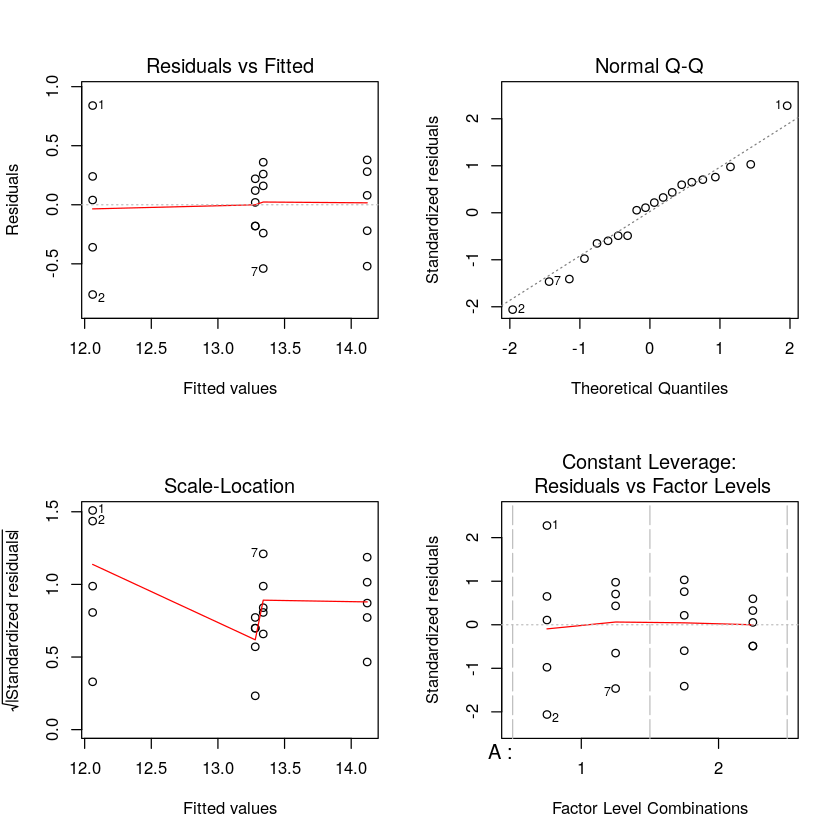

In [92]:
par(mfrow=c(2,2))
plot(modelAB)

From the Residual vs. Fitted plot we can see that for each vertical line of points representing a different treatment, the spread on the points appear to be equal. So the assumption of constant variance is not violated. 

From the QQ-plot above we could conclude that since basically all the points fall on the dotted line, thus the residuals are normal. 

Thus no transformation needed in this case.

### (c) 

Describe the effect of Factors A and B on mean respnose. This description should use the results
of hypothesis tests and p-values as described in class. Discuss any relevant interaction effects, main
effects and pairwise differences between treatment means. Provide a plot that shows the means for all
combinations of factor levels. Provide R code and output that supports your results.

Since we reject the null hypothesis and find a significant interaction effect between A and B, so instead of looking at the levels of Factor A and Factor B independently, we proceed directly to looking for significant differences between all possible combinations of treatments.

 contrast  estimate        SE df t.ratio p.value
 1,1 - 2,1    -2.06 0.2607681 16  -7.900  <.0001
 1,1 - 1,2    -1.28 0.2607681 16  -4.909  0.0008
 1,1 - 2,2    -1.22 0.2607681 16  -4.678  0.0013
 2,1 - 1,2     0.78 0.2607681 16   2.991  0.0389
 2,1 - 2,2     0.84 0.2607681 16   3.221  0.0247
 1,2 - 2,2     0.06 0.2607681 16   0.230  0.9955

P value adjustment: tukey method for comparing a family of 4 estimates 

A B lsmean SE        df lower.CL upper.CL .group
1 1 1 12.06  0.1843909 16 11.66911 12.45089  1    
4 2 2 13.28  0.1843909 16 12.88911 13.67089   2   
3 1 2 13.34  0.1843909 16 12.94911 13.73089   2   
2 2 1 14.12  0.1843909 16 13.72911 14.51089    3

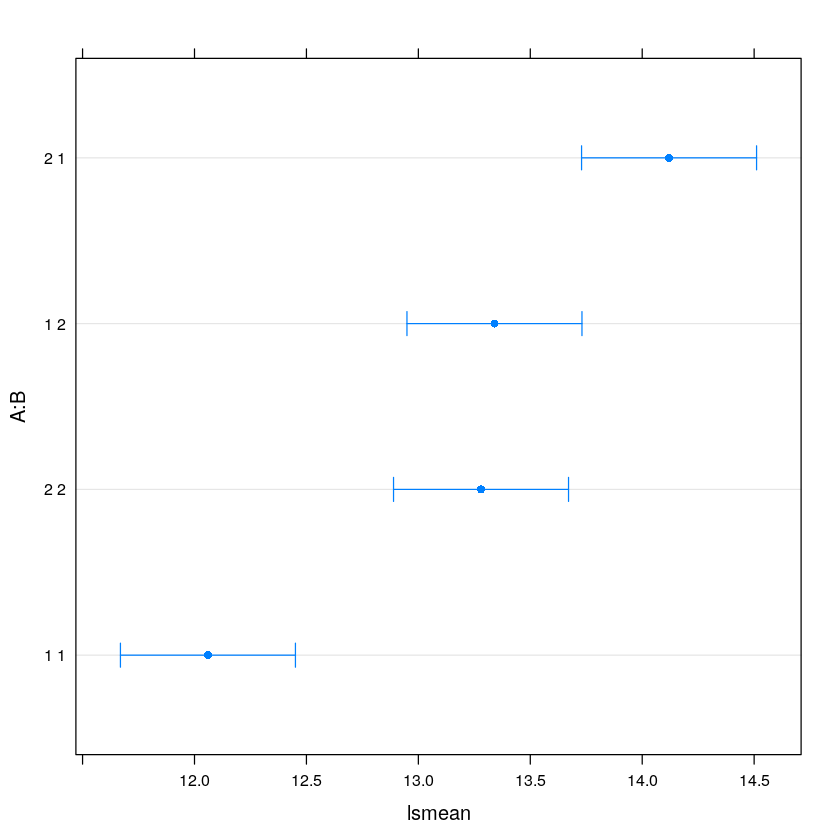

In [95]:
lsminter=lsmeans(modelAB, ~ A:B)
contrast(lsminter,method="pairwise")
contrast_inter = cld(lsminter, alpha=0.05)
contrast_inter
plot(contrast_inter)

We could interpret the results of this analysis as follows:
- A1-B1 has significantly lower mean than A2-B1, A1-B2, A2-B2.
- A2-B1 has significantly lower mean than A1-B2, A2-B2.
- No other comparisons are significantly different than zero.